In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['seaborn-bright','dark_background'])

In [2]:
data = pd.read_csv('churn_prediction_simple.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,0,0.0,0,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,6,2531,42,0,2.0,0,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
2,7,263,42,1,0.0,0,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0
3,8,5922,72,0,0.0,1,1020.0,1,1,98.0,...,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0
4,9,1145,46,0,0.0,0,623.0,2,317,172.0,...,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22067 entries, 0 to 22066
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     22067 non-null  int64  
 1   vintage                         22067 non-null  int64  
 2   age                             22067 non-null  int64  
 3   gender                          22067 non-null  int64  
 4   dependents                      22067 non-null  float64
 5   occupation                      22067 non-null  int64  
 6   city                            22067 non-null  float64
 7   customer_nw_category            22067 non-null  int64  
 8   branch_code                     22067 non-null  int64  
 9   days_since_last_transaction     22067 non-null  float64
 10  current_balance                 22067 non-null  float64
 11  previous_month_end_balance      22067 non-null  float64
 12  average_monthly_balance_prevQ   

In [4]:
data['churn'].value_counts()/len(data)

0    0.806317
1    0.193683
Name: churn, dtype: float64

In [5]:
#seperating dependent and independent variables

X = data.drop(columns=['churn', 'customer_id'])
Y = data['churn']

In [6]:
#Scaling the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [7]:
#Spliting the dataset

from sklearn.model_selection import train_test_split as tts
x_train, x_test, y_train, y_test = tts(scaled_X,Y,train_size=0.80, stratify=Y)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((17653, 19), (4414, 19), (17653,), (4414,))

# model building, prediction and odds ratio

In [8]:
from sklearn.linear_model import LogisticRegression as LR
classifier = LR(class_weight='balanced')


In [9]:
classifier.fit(x_train, y_train)
predicted_values = classifier.predict(x_test)
predicted_probabilities = classifier.predict_proba(x_test)

## accuracy

In [10]:
classifier.score(x_test,y_test)

0.7104666968735841

In [11]:
from sklearn.metrics import precision_score
Precision = precision_score(y_test,predicted_values)
Precision

0.36502871729419273

## Recall

In [12]:
from sklearn.metrics import recall_score
Recall = recall_score(y_test,predicted_values)
Recall

0.6690058479532164

## Calculating f1-score (harmonic mean of both) 
we can use a manual formula or can also use our favorate sweet sa sklearn library

In [13]:
from sklearn.metrics import f1_score
F1 = f1_score(y_test,predicted_values)
F1

0.4723369116432701

### Hum sath sath hai

In [14]:
from sklearn.metrics import precision_recall_fscore_support as PRF_summary

In [15]:
pres, rec, f1, sup = PRF_summary(y_test,predicted_values)

In [16]:
pres, rec, f1, sup

(array([0.90059712, 0.36502872]),
 array([0.72042709, 0.66900585]),
 array([0.80049953, 0.47233691]),
 array([3559,  855], dtype=int64))

In [17]:
from sklearn.metrics import classification_report
k = classification_report(y_test,predicted_values)
print(k)

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      3559
           1       0.37      0.67      0.47       855

    accuracy                           0.71      4414
   macro avg       0.63      0.69      0.64      4414
weighted avg       0.80      0.71      0.74      4414



In [22]:
from sklearn.metrics import precision_recall_curve as prc
pre_pt, rec_pt, th_pt = prc(y_test,predicted_probabilities[:,1])
pre_pt.shape, rec_pt.shape, th_pt.shape

((4414,), (4414,), (4413,))

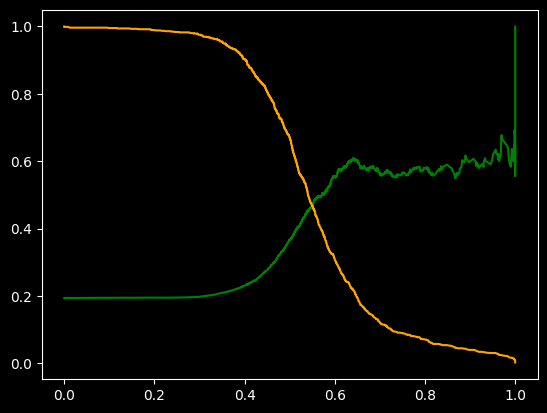

In [25]:
plt.plot( th_pt, pre_pt[:-1], color = 'green', label = 'Precision Curve')
plt.plot( th_pt, rec_pt[:-1], color = 'orange', label = 'Recall Curve')
plt.show()

# AUC-ROC curve

In [26]:
from sklearn.metrics import roc_curve , roc_auc_score
fpr, tpr, threshold = roc_curve(y_test, predicted_probabilities[:,1])

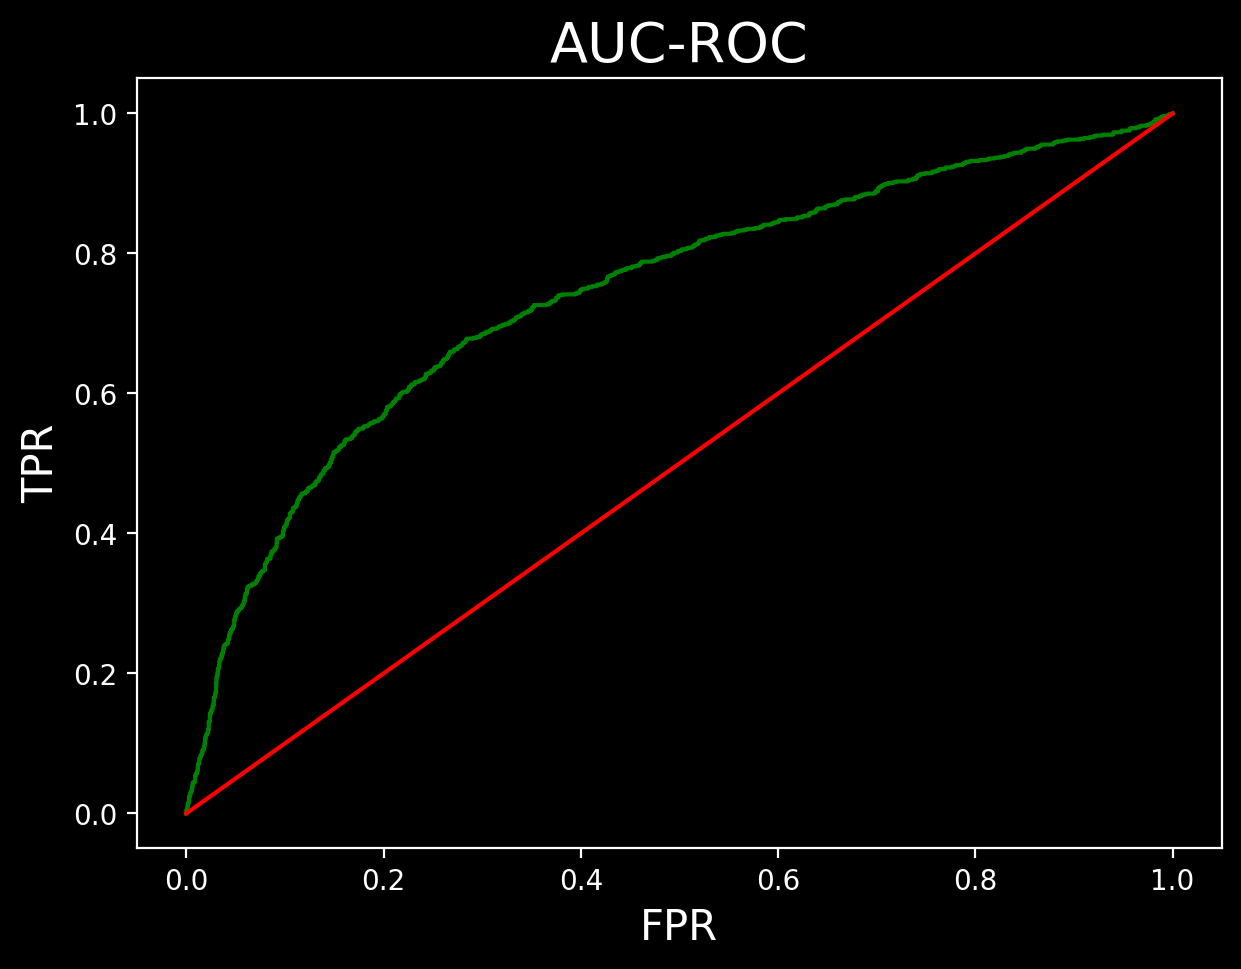

0.740818844901896

In [27]:
plt.figure(figsize = (7,5), dpi = 200)
plt.plot( fpr, tpr, color = 'green')
plt.plot( [0,1], [0,1], label = 'baseline', color = 'red')
plt.xlabel('FPR', fontsize = 15)
plt.ylabel('TPR', fontsize = 15)
plt.title('AUC-ROC', fontsize = 20)
plt.show()
roc_auc_score(y_test, predicted_probabilities[:,1])

Text(0.5, 1.0, 'Coefficient plot')

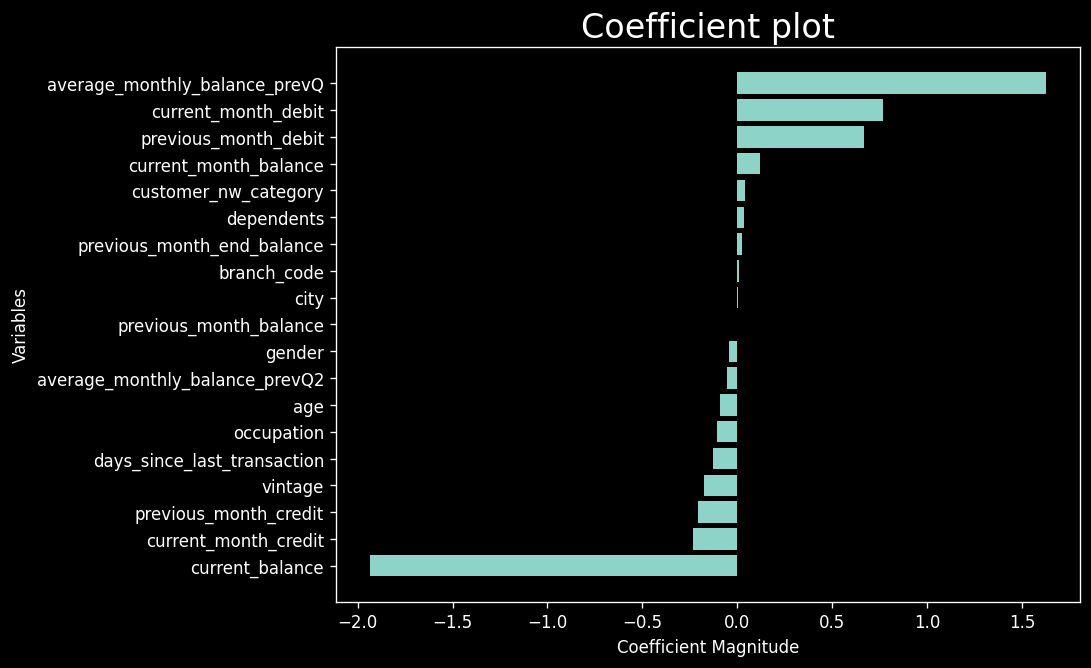

In [29]:
# arranging the data
c = classifier.coef_.reshape(-1)
x = X.columns

coeff_plot = pd.DataFrame( {
                            'coefficients': c,
                            'variable' : x
                            })

# sorting the values
coeff_plot = coeff_plot.sort_values(by = 'coefficients')
coeff_plot.head()


plt.figure(figsize=(8, 6), dpi=120)
plt.barh( coeff_plot['variable'] , coeff_plot['coefficients'] )
plt.xlabel( "Coefficient Magnitude", fontsize = 10)
plt.ylabel('Variables', fontsize = 10)
plt.title('Coefficient plot', fontsize = 20)